In [2]:
import pandas as pd
import random

# Load the existing dataset
df = pd.read_csv("/content/email.csv")

# Create synthetic ham and spam messages
ham_messages = [
    "Hey, just finished the meeting. Let's talk later.",
    "Can you send me the report by EOD?",
    "I'm running late, but I'll be there soon.",
    "Don't forget the groceries: milk, eggs, and bread.",
    "Let's meet at the café near your office around 4pm.",
    "Your appointment is confirmed for 3 PM tomorrow.",
    "Did you finish the assignment due this weekend?",
    "The client meeting has been moved to next week.",
    "I uploaded the files on Drive. Please check.",
    "Dinner was amazing, thanks for the recipe!",
    "Where are you? We are waiting at the gate.",
    "The exam got postponed to next Monday.",
    "I’m boarding the train now. Will call you later.",
    "Project deadline is tight. Let's sync up.",
    "Movie starts at 8 PM. Book your ticket soon.",
    "This weekend is perfect for the road trip!",
    "Can you help me debug this issue in Python?",
    "Happy Anniversary! Wishing you many more.",
    "Remember to bring your ID for verification.",
    "Good luck with your presentation tomorrow!"
]

spam_messages = [
    "You've won a FREE iPhone! Click here to claim now!",
    "Exclusive deal! Buy 1 get 3 free. Visit spamdealz.co.uk",
    "Your loan is approved. Call 09012345678 now!",
    "You are selected for a cash prize! Reply YES to win.",
    "Congratulations! You’ve been selected for a free cruise.",
    "URGENT: Your account is suspended. Click here to verify.",
    "Earn $500/day working from home. Limited offer!",
    "Act now! 50% discount on all products for today only.",
    "SMS Winner: Call 08001234567 to collect your reward.",
    "Your number has won £1000. Contact us immediately.",
    "FREE entry into our prize draw. Text WIN to 12345.",
    "Get your personal loan approved instantly. Apply now!",
    "Unsecured credit available. No credit check required.",
    "You have a pending Amazon refund. Confirm now!",
    "Claim your free Netflix subscription. Click here!",
    "Your parcel is on hold. Verify address now.",
    "This is your last chance to extend car warranty!",
    "Win a brand new laptop. Text GIFT to 99999.",
    "We have your lost package. Confirm identity now.",
    "Get cheap Viagra without prescription. Limited stock!"
]

# Generate 200 new rows
new_data = []
for _ in range(200):
    if random.random() < 0.5:  # 50% chance ham
        msg = random.choice(ham_messages)
        label = 'ham'
    else:
        msg = random.choice(spam_messages)
        label = 'spam'
    new_data.append([label, msg])

# Convert to DataFrame
new_df = pd.DataFrame(new_data, columns=['Category', 'Message'])

# Append to original DataFrame
df = pd.concat([df, new_df], ignore_index=True)

# Save the updated DataFrame
df.to_csv("spam_data_extended.csv", index=False)

print("✅ Appended 200 new complex rows to 'spam_data_extended.csv'")


✅ Appended 200 new complex rows to 'spam_data_extended.csv'


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing and modeling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the updated dataset
df = pd.read_csv("spam_data_extended.csv")

# View first few rows
df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Rename columns if not already named
df.columns = ['label', 'message']

# Drop any nulls
df.dropna(inplace=True)

# Encode the labels: ham = 0, spam = 1
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Confirm label encoding
print(df['label'].value_counts())
print(df['label_num'].value_counts())

# Optional: Lowercase all text
df['message'] = df['message'].str.lower()

# View final cleaned data
df.head()


label
ham               4929
spam               843
{"mode":"full"       1
Name: count, dtype: int64
label_num
0.0    4929
1.0     843
Name: count, dtype: int64


,label,message,label_num
0,ham,"go until jurong point, crazy.. available only ...",0.0
1,ham,ok lar... joking wif u oni...,0.0
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1.0
3,ham,u dun say so early hor... u c already then say...,0.0
4,ham,"nah i don't think he goes to usf, he lives aro...",0.0


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the message column
X = vectorizer.fit_transform(df['message'])

# Labels (already encoded as 0 or 1)
y = df['label_num']

# Check shape
print("Feature matrix shape:", X.shape)


Feature matrix shape: (5773, 8737)


In [6]:
print(df.columns)


Index(['label', 'message', 'label_num'], dtype='object')


In [7]:
X = df['message']      # input features (text data)
y = df['label_num']    # target labels (0 = ham, 1 = spam)


In [8]:
print(df.isnull().sum())  # should show all zeros
print(df.shape)           # to check how many rows remain


label        0
message      0
label_num    1
dtype: int64
(5773, 3)


In [9]:
df = df.dropna()


In [10]:
print(df.isnull().sum())  # should show all zeros
print(df.shape)           # to check how many rows remain


label        0
message      0
label_num    0
dtype: int64
(5772, 3)


In [11]:
from sklearn.model_selection import train_test_split

# Features and labels
X = df['message']
y = df['label_num']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit on training data and transform both train and test
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
nb = MultinomialNB()
rf = RandomForestClassifier()
svm = SVC(probability=True)
knn = KNeighborsClassifier()

# Train models
log_reg.fit(X_train_vec, y_train)
nb.fit(X_train_vec, y_train)
rf.fit(X_train_vec, y_train)
svm.fit(X_train_vec, y_train)
knn.fit(X_train_vec, y_train)


KNeighborsClassifier()


=== Logistic Regression ===
Accuracy: 96.45%
Precision: 0.9656
Recall:    0.9645
F1 Score:  0.9627
Confusion Matrix:
[[972   1]
 [ 40 142]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       973
         1.0       0.99      0.78      0.87       182

    accuracy                           0.96      1155
   macro avg       0.98      0.89      0.93      1155
weighted avg       0.97      0.96      0.96      1155



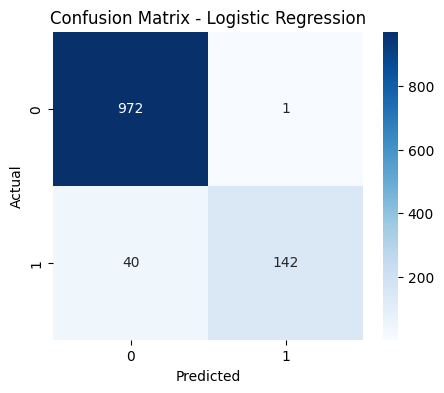


=== Naive Bayes ===
Accuracy: 97.58%
Precision: 0.9762
Recall:    0.9758
F1 Score:  0.9750
Confusion Matrix:
[[972   1]
 [ 27 155]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       973
         1.0       0.99      0.85      0.92       182

    accuracy                           0.98      1155
   macro avg       0.98      0.93      0.95      1155
weighted avg       0.98      0.98      0.97      1155



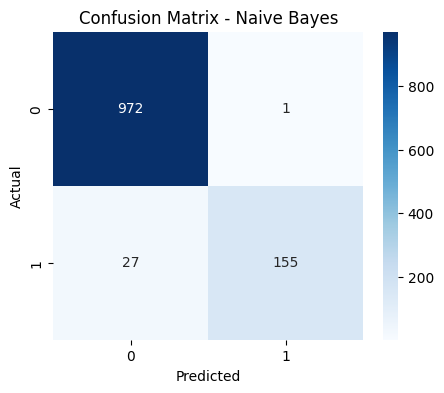


=== Random Forest ===
Accuracy: 98.44%
Precision: 0.9846
Recall:    0.9844
F1 Score:  0.9841
Confusion Matrix:
[[972   1]
 [ 17 165]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       973
         1.0       0.99      0.91      0.95       182

    accuracy                           0.98      1155
   macro avg       0.99      0.95      0.97      1155
weighted avg       0.98      0.98      0.98      1155



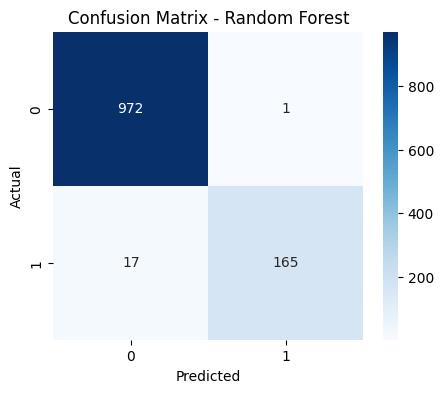


=== SVM ===
Accuracy: 98.18%
Precision: 0.9822
Recall:    0.9818
F1 Score:  0.9814
Confusion Matrix:
[[973   0]
 [ 21 161]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       973
         1.0       1.00      0.88      0.94       182

    accuracy                           0.98      1155
   macro avg       0.99      0.94      0.96      1155
weighted avg       0.98      0.98      0.98      1155



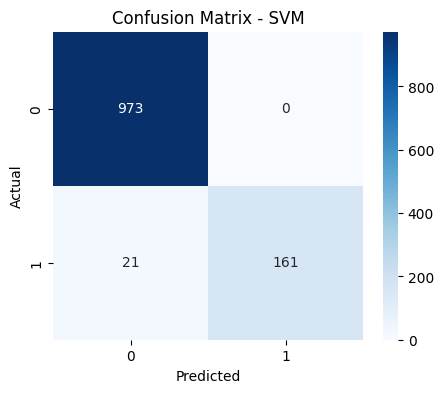


=== KNN ===
Accuracy: 91.08%
Precision: 0.9194
Recall:    0.9108
F1 Score:  0.8955
Confusion Matrix:
[[973   0]
 [103  79]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       973
         1.0       1.00      0.43      0.61       182

    accuracy                           0.91      1155
   macro avg       0.95      0.72      0.78      1155
weighted avg       0.92      0.91      0.90      1155



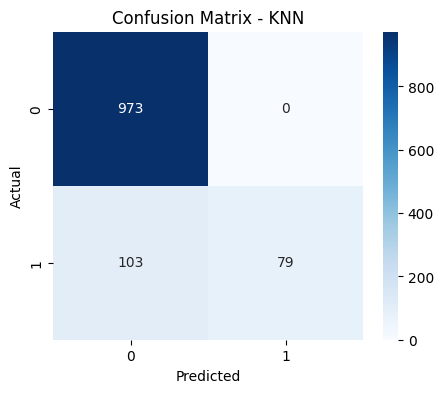

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": log_reg,
    "Naive Bayes": nb,
    "Random Forest": rf,
    "SVM": svm,
    "KNN": knn
}

for name, model in models.items():
    print(f"\n=== {name} ===")
    y_pred = model.predict(X_test_vec)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(f"Accuracy: {accuracy:.2f}%")

    # Precision, Recall, F1
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix Heatmap
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [21]:
# Custom test messages
custom_messages = [
    "Congratulations! You've won a $1000 Walmart gift card. Click here to claim.",
    "Hi Mom, can you call me back when you're free?",
    "URGENT! Your account has been suspended. Verify your information immediately.",
    "Don't miss out on our limited-time offer!",
    "Meeting is scheduled at 3 PM. Please be on time.",
    "Your OTP for login is 945678. Do not share it with anyone.",
    "Free entry in 2 a weekly competition to win FA Cup final tkts 21st May 2005.",
    "Can we reschedule our coffee meeting to tomorrow?",
    "Earn money from home without investment. Just click and start.",
    "Hey! Just checking in to see how you're doing."
]

# Vectorize the custom messages
custom_vec = vectorizer.transform(custom_messages)

# Predict using each model
print("=== Prediction Results ===")
for name, model in models.items():
    preds = model.predict(custom_vec)
    print(f"\n{name}:")
    for i, msg in enumerate(custom_messages):
        print(f"Message: {msg}\nPrediction: {preds[i]}\n")


=== Prediction Results ===

Logistic Regression:
Message: Congratulations! You've won a $1000 Walmart gift card. Click here to claim.
Prediction: 1.0

Message: Hi Mom, can you call me back when you're free?
Prediction: 0.0

Message: URGENT! Your account has been suspended. Verify your information immediately.
Prediction: 1.0

Message: Don't miss out on our limited-time offer!
Prediction: 0.0

Message: Meeting is scheduled at 3 PM. Please be on time.
Prediction: 0.0

Message: Your OTP for login is 945678. Do not share it with anyone.
Prediction: 0.0

Message: Free entry in 2 a weekly competition to win FA Cup final tkts 21st May 2005.
Prediction: 0.0

Message: Can we reschedule our coffee meeting to tomorrow?
Prediction: 0.0

Message: Earn money from home without investment. Just click and start.
Prediction: 0.0

Message: Hey! Just checking in to see how you're doing.
Prediction: 0.0


Naive Bayes:
Message: Congratulations! You've won a $1000 Walmart gift card. Click here to claim.
Pred

In [16]:
# Ask for user input
user_message = input("Enter a message to classify as Spam or Not Spam (Ham):\n")

# Transform the message using the trained TF-IDF vectorizer
user_message_transformed = vectorizer.transform([user_message])

# Predict with all models
print("=== Prediction Results ===")
print("Logistic Regression:", log_reg.predict(user_message_transformed)[0])
print("Naive Bayes:", nb.predict(user_message_transformed)[0])
print("Random Forest:", rf.predict(user_message_transformed)[0])
print("SVM:", svm.predict(user_message_transformed)[0])
print("KNN:", knn.predict(user_message_transformed)[0])


KeyboardInterrupt: Interrupted by user

In [ ]:
# Ask for user input
user_message = input("Enter a message to classify as Spam or Not Spam (Ham):\n")

# Transform the message using the trained TF-IDF vectorizer
user_message_transformed = vectorizer.transform([user_message])

# Predict with all models
print("=== Prediction Results ===")
print("Logistic Regression:", log_reg.predict(user_message_transformed)[0])
print("Naive Bayes:", nb.predict(user_message_transformed)[0])
print("Random Forest:", rf.predict(user_message_transformed)[0])
print("SVM:", svm.predict(user_message_transformed)[0])
print("KNN:", knn.predict(user_message_transformed)[0])


Enter a message to classify as Spam or Not Spam (Ham):
Subject: Unusual login activity detected – Verify Now  Dear User,  We noticed suspicious login attempts to your account from: 📍 Location: Vietnam   📅 Time: August 4, 2025, 03:22 AM  To protect your account, we’ve temporarily disabled access.  Please confirm your identity by clicking the link below: 👉 [secure.your-bank-verification.net]  Failure to respond in 24 hours will result in permanent suspension.  Sincerely,   Security Team   Axis Bank
=== Prediction Results ===
Logistic Regression: 0.0
Naive Bayes: 1.0
Random Forest: 0.0
SVM: 0.0
KNN: 0.0


In [ ]:
# Ask for user input
user_message = input("Enter a message to classify as Spam or Not Spam (Ham):\n")

# Transform the message using the trained TF-IDF vectorizer
user_message_transformed = vectorizer.transform([user_message])

# Predict with all models
print("=== Prediction Results ===")
print("Logistic Regression:", log_reg.predict(user_message_transformed)[0])
print("Naive Bayes:", nb.predict(user_message_transformed)[0])
print("Random Forest:", rf.predict(user_message_transformed)[0])
print("SVM:", svm.predict(user_message_transformed)[0])
print("KNN:", knn.predict(user_message_transformed)[0])

Enter a message to classify as Spam or Not Spam (Ham):
 Thank you for registering to Advisory Launchpad Graduation Day - Virtual, your registration is complete! Event details When: 31 Jul 2025 03:30 PM - 31 Jul 2025 05:00 PM Where: Event Link PwC Talent Acquisition​​​​​​​​​​​​​: No organizer​​​​​​                     Regards,           PwC Talent Acquisition
=== Prediction Results ===
Logistic Regression: 0.0
Naive Bayes: 0.0
Random Forest: 0.0
SVM: 0.0
KNN: 0.0


In [ ]:
# Ask for user input
user_message = input("Enter a message to classify as Spam or Not Spam (Ham):\n")

# Transform the message using the trained TF-IDF vectorizer
user_message_transformed = vectorizer.transform([user_message])

# Predict with all models
print("=== Prediction Results ===")
print("Logistic Regression:", log_reg.predict(user_message_transformed)[0])
print("Naive Bayes:", nb.predict(user_message_transformed)[0])
print("Random Forest:", rf.predict(user_message_transformed)[0])
print("SVM:", svm.predict(user_message_transformed)[0])
print("KNN:", knn.predict(user_message_transformed)[0])

Enter a message to classify as Spam or Not Spam (Ham):
The following submission has been created.  Track Name: ICSDP2025  Paper ID: 52  Paper Title: A Machine Learning Approach to Nadi Pariksha: Detecting Dosha Imbalances  Abstract: This research introduces PulseVision: AI-based Nadi Pariksha Health Diagnosis, an AI-based system for automated and upgraded traditional Ayurvedic diagnostic process of Nadi Pariksha. The analysis uses a panel-based dataset containing pulse-derived diagnostic attributes that have been preprocessed by the Random Forest classifier to reliably identify the major dosha, i.e., Vata, Pitta, Kapha, or mixture. The 5-fold cross-validation method guarantees the robustness of the model and leads to both high accuracy and reliability of the classification.The model’s performance is evaluated using accuracy, but other evaluation metrics like precision, recall, F1-score, or ROC-AUC may also be used wherever applicatble The accuracy of the random forest was found to be 9

In [ ]:
# Ask for user input
user_message = input("Enter a message to classify as Spam or Not Spam (Ham):\n")

# Transform the message using the trained TF-IDF vectorizer
user_message_transformed = vectorizer.transform([user_message])

# Predict with all models
print("=== Prediction Results ===")
print("Logistic Regression:", log_reg.predict(user_message_transformed)[0])
print("Naive Bayes:", nb.predict(user_message_transformed)[0])
print("Random Forest:", rf.predict(user_message_transformed)[0])
print("SVM:", svm.predict(user_message_transformed)[0])
print("KNN:", knn.predict(user_message_transformed)[0])

Enter a message to classify as Spam or Not Spam (Ham):
We reviewed your LinkedIn profile and found you suitable for a high-paying remote job opportunity ($2000/week). No experience required. Fill this form to start: http://bit.ly/jobnow123 Positions filling fast. Limited slots!
=== Prediction Results ===
Logistic Regression: 0.0
Naive Bayes: 0.0
Random Forest: 1.0
SVM: 0.0
KNN: 0.0


In [ ]:
# Ask for user input
user_message = input("Enter a message to classify as Spam or Not Spam (Ham):\n")

# Transform the message using the trained TF-IDF vectorizer
user_message_transformed = vectorizer.transform([user_message])

# Predict with all models
print("=== Prediction Results ===")
print("Logistic Regression:", log_reg.predict(user_message_transformed)[0])
print("Naive Bayes:", nb.predict(user_message_transformed)[0])
print("Random Forest:", rf.predict(user_message_transformed)[0])
print("SVM:", svm.predict(user_message_transformed)[0])
print("KNN:", knn.predict(user_message_transformed)[0])



Enter a message to classify as Spam or Not Spam (Ham):
Subject: Work From Home and Earn Thousands  No skills required! Make thousands every week by working from home. Limited slots available.  Sign up here: http://easycash.fakework.com
=== Prediction Results ===
Logistic Regression: 0.0
Naive Bayes: 0.0
Random Forest: 1.0
SVM: 0.0
KNN: 1.0


In [22]:
import pickle

# Save the trained model (Random Forest) and vectorizer
with open("model.pkl", "wb") as f:
    pickle.dump(rf, f)

with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)


In [23]:
!pip install streamlit pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 112.0 MB/s eta 0:00:00


In [24]:
%%writefile app.py
import streamlit as st
import pickle

# Load model and vectorizer
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

with open("vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)

# Streamlit UI
st.title("📩 Spam Message Classifier")
st.write("Enter a message below and the model will predict if it's **Spam** or **Ham (Not Spam)**.")

user_input = st.text_area("Enter your message here:", "")

if st.button("Predict"):
    if user_input.strip() == "":
        st.warning("⚠️ Please enter a message.")
    else:
        user_transformed = vectorizer.transform([user_input])
        prediction = model.predict(user_transformed)[0]
        if prediction == 1:
            st.error("🚫 This message is classified as **SPAM**.")
        else:
            st.success("✅ This message is classified as **HAM (Not Spam)**.")


Writing app.py


In [25]:
!ngrok config add-authtoken 30s88Gqu99vrkjFCRuNIwLcffss_7nQh4nBWKF9WKU49BxfAy


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [26]:
from pyngrok import ngrok

# Kill any previous tunnels
ngrok.kill()

# Start Streamlit app
!streamlit run app.py &>/dev/null &

# Open public tunnel
public_url = ngrok.connect(8501)
print("🔗 Your app is live at:", public_url)


🔗 Your app is live at: NgrokTunnel: "https://0e82be6a1aa2.ngrok-free.app" -> "http://localhost:8501"
